# World University Ranking Analysis

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains global university rankings from **The Times Higher Education World University Ranking**. The Times Higher Education World University Ranking is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.

This dataset is obtained from [here](https://www.kaggle.com/mylesoneill/world-university-rankings).
Here the fluctuations in ranks of Universities along with the staff student ratio, international student percentage and gender ratio shall be analysed. 

## Loading the dataset

There are three datasets available in the above mentioned link. This analysis is for the report provided by The Times Higher Education World University Ranking. Let's load the dataset.

In [1]:
import sys
print(sys.version)

3.8.5 (default, Jul 21 2020, 10:48:26) 
[Clang 11.0.3 (clang-1103.0.32.62)]


In [2]:
# Import pandas
import pandas as pd

univ_ranking_dataset = pd.read_csv('data_files/timesData.csv')
univ_ranking_dataset.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


## Analyse and clean the data

In [3]:
# Shape of the dataframe
rows, columns = univ_ranking_dataset.shape
f"There are {rows} rows and {columns} columns"

'There are 2603 rows and 14 columns'

In [4]:
# analyse column properties for the dataset
univ_ranking_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

Columns `teaching`, `international`, `research`, `citations` and `income` are not required as the `total_score` is considered for ranking. The following rows have invalid values: `num_students`, `student_staff_ratio`, `international_students`, `female_male_ratio`.

Let's start with dropping the unwanted columns

In [5]:
# Drop unwanted columns
univ_ranking_dataset.drop(columns=['teaching','international','research','citations','income'],inplace=True)

In [6]:
# Have a look at the lower end of dataset
univ_ranking_dataset.tail(10)

,world_rank,university_name,country,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2593,601-800,University of West Bohemia,Czech Republic,-,"15,639",21.5,2%,52 : 48,2016
2594,601-800,University of the West of England,United Kingdom,-,"22,525",21.4,15%,53 : 47,2016
2595,601-800,West University of Timişoara,Romania,-,"12,933",19.0,3%,62 : 38,2016
2596,601-800,University of Westminster,United Kingdom,-,"16,609",21.0,43%,57 : 43,2016
2597,601-800,Xidian University,China,-,"31,618",16.4,2%,29 : 71,2016
2598,601-800,Yeungnam University,South Korea,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,-,"10,117",12.1,8%,28 : 72,2016
2602,601-800,Yuan Ze University,Taiwan,-,"8,663",20.6,4%,43 : 57,2016


It can be seen here that the `total_score` is missing for few universities. Since total score is used for tanking, the ranks for such institutions is given as a range. Therefore, the `world_rank` is also not a definite number. Lets drop in records that do not have a definite world rank alloted. Before that, the universities that share the same rank in the same year have "=" in front of the rank. Remove that.

In [7]:
# Remove "=" from the world_rank
univ_ranking_dataset.world_rank = univ_ranking_dataset.world_rank.str.strip('=')

In [8]:
# convert non numeric values like ranges to NaN
univ_ranking_dataset["world_rank"] = pd.to_numeric(univ_ranking_dataset["world_rank"], errors='coerce')

In [9]:
# drop rows that do not have a world rank
univ_ranking_dataset.dropna(subset=["world_rank"], inplace=True)

In [10]:
# convert world rank to integer and view the dataset
univ_ranking_dataset["world_rank"] = univ_ranking_dataset["world_rank"].astype('int')
univ_ranking_dataset

,world_rank,university_name,country,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...
1998,196,Newcastle University,United Kingdom,49.2,"20,174",15.2,29%,50 : 50,2016
1999,196,"St George’s, University of London",United Kingdom,49.2,"2,958",13.4,17%,61 : 39,2016
2000,198,University of Trento,Italy,49.1,"16,841",43.2,8%,51 : 49,2016
2001,199,Paris Diderot University – Paris 7,France,48.9,"27,756",14.8,17%,63 : 37,2016


In [11]:
# Final check as to there are no invalid values in total_score column
len(univ_ranking_dataset[univ_ranking_dataset.total_score == "-"])

0

Let us now clean the columns `num_students` and `international_students` to have no commas and percent(%) sign respectively. `num_students` is convert to int type and `international_students` is converted to float and divided by 100, to get the ratio.

In [12]:
univ_ranking_dataset['num_students'] = pd.to_numeric(univ_ranking_dataset['num_students'].str.replace(',', ''), errors="coerce")
univ_ranking_dataset['international_students'] = pd.to_numeric(univ_ranking_dataset['international_students'].str.replace('%', ''), errors="coerce")/100
univ_ranking_dataset

,world_rank,university_name,country,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,96.1,20152.0,8.9,0.25,NaN,2011
1,2,California Institute of Technology,United States of America,96.0,2243.0,6.9,0.27,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,95.6,11074.0,9.0,0.33,37 : 63,2011
3,4,Stanford University,United States of America,94.3,15596.0,7.8,0.22,42 : 58,2011
4,5,Princeton University,United States of America,94.2,7929.0,8.4,0.27,45 : 55,2011
...,...,...,...,...,...,...,...,...,...
1998,196,Newcastle University,United Kingdom,49.2,20174.0,15.2,0.29,50 : 50,2016
1999,196,"St George’s, University of London",United Kingdom,49.2,2958.0,13.4,0.17,61 : 39,2016
2000,198,University of Trento,Italy,49.1,16841.0,43.2,0.08,51 : 49,2016
2001,199,Paris Diderot University – Paris 7,France,48.9,27756.0,14.8,0.17,63 : 37,2016


In [13]:
univ_ranking_dataset.describe()

,world_rank,num_students,student_staff_ratio,international_students,year
count,1201.000000,1182.000000,1182.000000,1181.000000,1201.000000
mean,100.233972,23891.501692,15.932318,0.196274,2013.501249
std,57.634735,13635.554030,9.437269,0.101746,1.708374
min,1.000000,462.000000,3.600000,0.010000,2011.000000
25%,50.000000,14221.000000,10.200000,0.120000,2012.000000
50%,100.000000,22616.000000,14.700000,0.180000,2014.000000
75%,150.000000,31326.000000,18.700000,0.260000,2015.000000
max,200.000000,127431.000000,85.800000,0.540000,2016.000000


In [14]:
univ_ranking_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 2002
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              1201 non-null   int64  
 1   university_name         1201 non-null   object 
 2   country                 1201 non-null   object 
 3   total_score             1201 non-null   object 
 4   num_students            1182 non-null   float64
 5   student_staff_ratio     1182 non-null   float64
 6   international_students  1181 non-null   float64
 7   female_male_ratio       1078 non-null   object 
 8   year                    1201 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 93.8+ KB


In [15]:
# Years in which data was recorded
univ_ranking_dataset.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

In [16]:
# No of countries considered 
univ_ranking_dataset.country.unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Luxembourg'], dtype=object)

In [17]:
# No of universities considered for each year
univ_ranking_dataset.groupby("year")[["university_name"]].count()

,university_name
year,
2011,200
2012,200
2013,200
2014,200
2015,201
2016,200


This shows that 2011 had less number of institutes included for world ranking while 2016 say a 4-fold increase.

## Visualization of analysis

Data visualization is an important part of data analysis. Pictorial representation of data oozes many conclusions.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 50)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
univ_ranking_dataset

,world_rank,university_name,country,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,96.1,20152.0,8.9,0.25,NaN,2011
1,2,California Institute of Technology,United States of America,96.0,2243.0,6.9,0.27,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,95.6,11074.0,9.0,0.33,37 : 63,2011
3,4,Stanford University,United States of America,94.3,15596.0,7.8,0.22,42 : 58,2011
4,5,Princeton University,United States of America,94.2,7929.0,8.4,0.27,45 : 55,2011
...,...,...,...,...,...,...,...,...,...
1998,196,Newcastle University,United Kingdom,49.2,20174.0,15.2,0.29,50 : 50,2016
1999,196,"St George’s, University of London",United Kingdom,49.2,2958.0,13.4,0.17,61 : 39,2016
2000,198,University of Trento,Italy,49.1,16841.0,43.2,0.08,51 : 49,2016
2001,199,Paris Diderot University – Paris 7,France,48.9,27756.0,14.8,0.17,63 : 37,2016


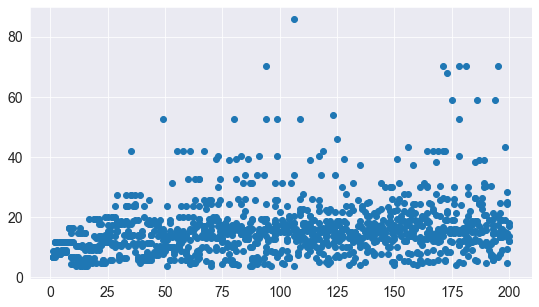

In [36]:
plt.scatter(univ_ranking_dataset.world_rank, univ_ranking_dataset.student_staff_ratio)

Nothing much can be concluded about the relation between

In [ ]:
plt.scatter(univ_ranking_dataset.groupby("country")[['total_score']].mean(), univ_ranking_dataset["country"].unique())

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

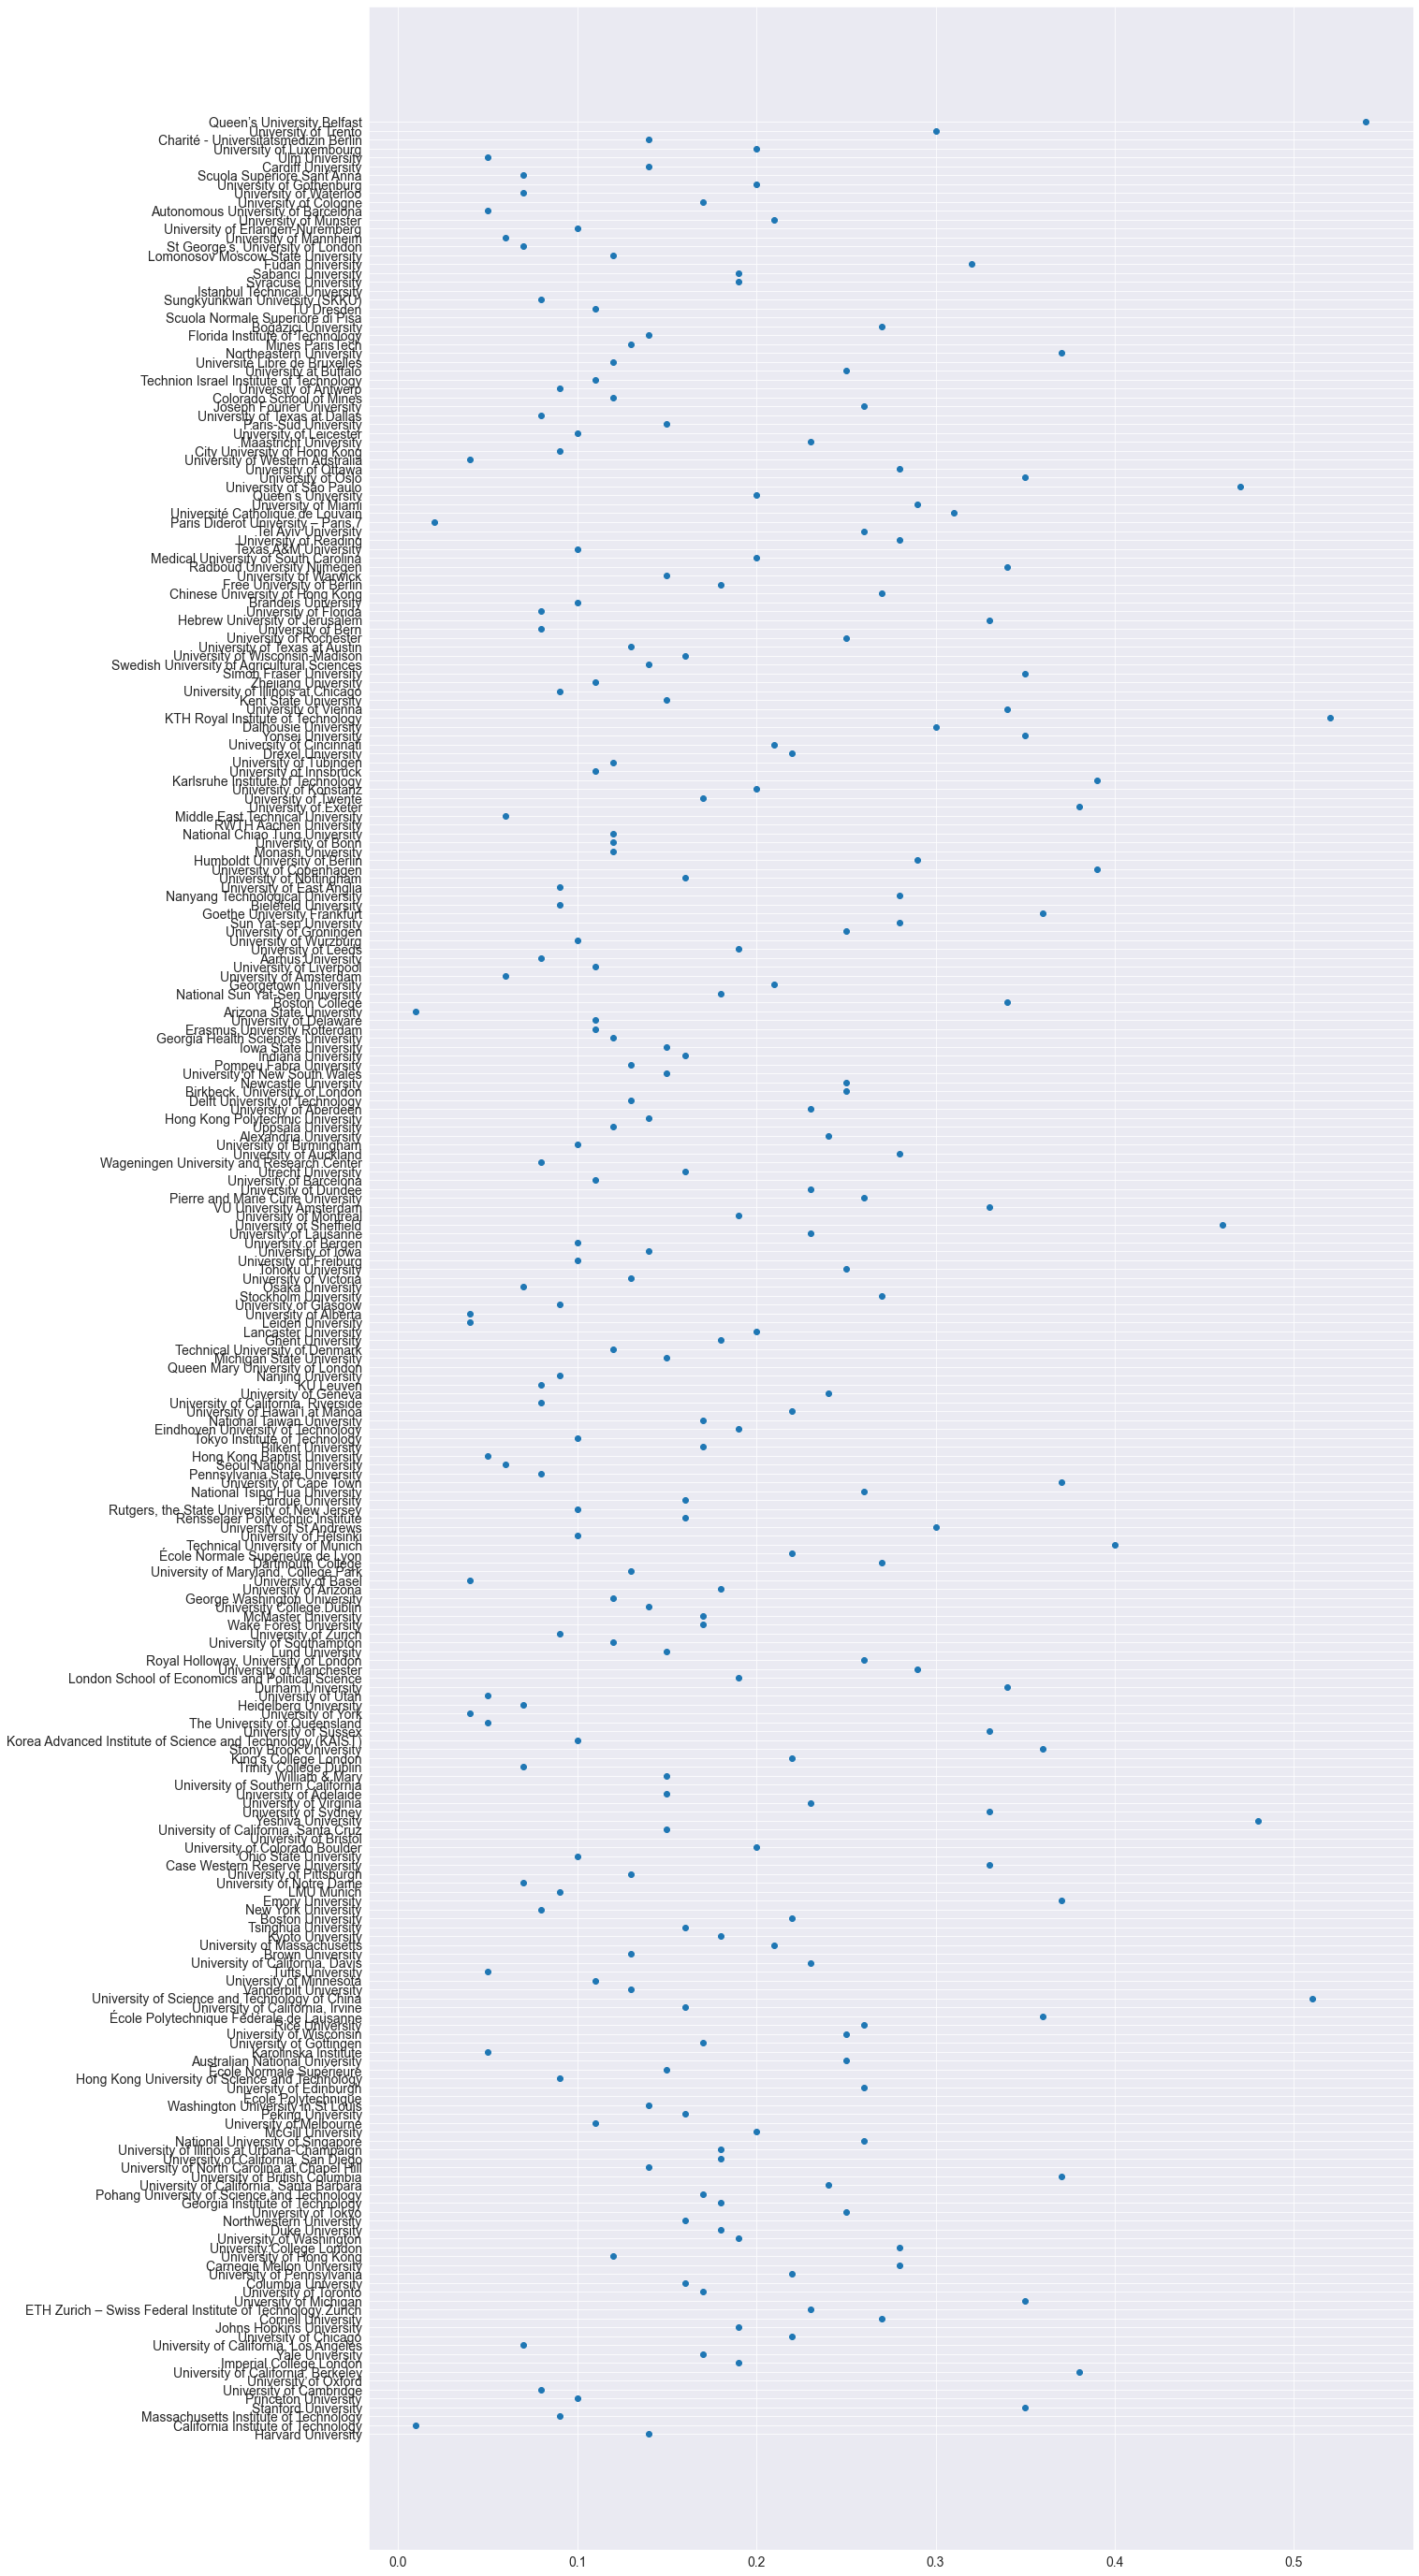

In [42]:
plt.scatter(univ_ranking_dataset.groupby('university_name')[['international_students']].mean(), univ_ranking_dataset.university_name.unique())

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()